In [1]:
import re 
import string
import PyPDF2
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [2]:
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [3]:
# creating a pdf file object 
pdfFileObj = open('young-robert-f-the-dandelion-girl.pdf', 'rb') 
  
# creating a pdf reader object 
pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 

pages = []

for page in range(pdfReader.numPages):
    pages.append(pdfReader.getPage(page).extractText())
    
# closing the pdf file object 
pdfFileObj.close()
pages

['-\n1\n-\n \n \nThe Dandelion Girl\n \nRobert F. Young\n \n \nThe girl on the hill made Mark think of Edna St. Vincent Millay. Perhaps it was because \nof the way she was standing there in the afternoon sun, her dandelion\n-\nhued hair dancing in the \nwind; perhaps it was because of \nthe way her old\n-\nfashioned white dress was swirling around her \nlong and slender legs. In any event, he got the definite impression that she had somehow stepped \nout of the past and into the present; and that was odd, because as things turned out, it wasn\'t t\nhe \npast she had stepped out of, but the future.\n \n \nHe paused some distance behind her, breathing hard from the climb. She had not seen \nhim yet, and he wondered how he could apprise her of his presence without alarming her. While \nhe was trying to make up his \nmind, he took out his pipe and filled and lighted it, cupping his \nhands over the bowl and puffing till the tobacco came to glowing life. When he looked at her \nagain, she h

In [4]:
f=open('pdf.txt','w')
for page in range(len(pages)):
    f.write(pages[page])
f.close()

In [5]:
with open('pdf.txt') as f:
    clean = f.read().splitlines()

In [6]:
clean

['-',
 '1',
 '-',
 ' ',
 ' ',
 'The Dandelion Girl',
 ' ',
 'Robert F. Young',
 ' ',
 ' ',
 'The girl on the hill made Mark think of Edna St. Vincent Millay. Perhaps it was because ',
 'of the way she was standing there in the afternoon sun, her dandelion',
 '-',
 'hued hair dancing in the ',
 'wind; perhaps it was because of ',
 'the way her old',
 '-',
 'fashioned white dress was swirling around her ',
 'long and slender legs. In any event, he got the definite impression that she had somehow stepped ',
 "out of the past and into the present; and that was odd, because as things turned out, it wasn't t",
 'he ',
 'past she had stepped out of, but the future.',
 ' ',
 ' ',
 'He paused some distance behind her, breathing hard from the climb. She had not seen ',
 'him yet, and he wondered how he could apprise her of his presence without alarming her. While ',
 'he was trying to make up his ',
 'mind, he took out his pipe and filled and lighted it, cupping his ',
 'hands over the bowl and 

In [7]:
shear = [re.sub(r"[^\w\d'\s]+", "", s) for s in clean] # get rid of punctuation
shear = [porter.stem(word) for word in shear]
shear = [lemmatizer.lemmatize(word) for word in shear]

shears = [x for x in shear if x != ' ']
shearss = [x for x in shears if x != '']

In [8]:
shear

['',
 '1',
 '',
 ' ',
 ' ',
 'the dandelion girl',
 ' ',
 'robert f young',
 ' ',
 ' ',
 'the girl on the hill made mark think of edna st vincent millay perhaps it was because ',
 'of the way she was standing there in the afternoon sun her dandelion',
 '',
 'hued hair dancing in the ',
 'wind perhaps it was because of ',
 'the way her old',
 '',
 'fashioned white dress was swirling around her ',
 'long and slender legs in any event he got the definite impression that she had somehow stepped ',
 "out of the past and into the present and that was odd because as things turned out it wasn't t",
 'he ',
 'past she had stepped out of but the futur',
 ' ',
 ' ',
 'he paused some distance behind her breathing hard from the climb she had not seen ',
 'him yet and he wondered how he could apprise her of his presence without alarming her while ',
 'he was trying to make up his ',
 'mind he took out his pipe and filled and lighted it cupping his ',
 'hands over the bowl and puffing till the tobacc

In [9]:
shears

['',
 '1',
 '',
 'the dandelion girl',
 'robert f young',
 'the girl on the hill made mark think of edna st vincent millay perhaps it was because ',
 'of the way she was standing there in the afternoon sun her dandelion',
 '',
 'hued hair dancing in the ',
 'wind perhaps it was because of ',
 'the way her old',
 '',
 'fashioned white dress was swirling around her ',
 'long and slender legs in any event he got the definite impression that she had somehow stepped ',
 "out of the past and into the present and that was odd because as things turned out it wasn't t",
 'he ',
 'past she had stepped out of but the futur',
 'he paused some distance behind her breathing hard from the climb she had not seen ',
 'him yet and he wondered how he could apprise her of his presence without alarming her while ',
 'he was trying to make up his ',
 'mind he took out his pipe and filled and lighted it cupping his ',
 'hands over the bowl and puffing till the tobacco came to glowing life when he looked at h

In [10]:
shearss

['1',
 'the dandelion girl',
 'robert f young',
 'the girl on the hill made mark think of edna st vincent millay perhaps it was because ',
 'of the way she was standing there in the afternoon sun her dandelion',
 'hued hair dancing in the ',
 'wind perhaps it was because of ',
 'the way her old',
 'fashioned white dress was swirling around her ',
 'long and slender legs in any event he got the definite impression that she had somehow stepped ',
 "out of the past and into the present and that was odd because as things turned out it wasn't t",
 'he ',
 'past she had stepped out of but the futur',
 'he paused some distance behind her breathing hard from the climb she had not seen ',
 'him yet and he wondered how he could apprise her of his presence without alarming her while ',
 'he was trying to make up his ',
 'mind he took out his pipe and filled and lighted it cupping his ',
 'hands over the bowl and puffing till the tobacco came to glowing life when he looked at her ',
 'again she ha

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import numpy as np
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy [pylab.py:160]


In [12]:
vect = TfidfVectorizer(ngram_range=(1,1),stop_words='english')

In [13]:
dtm = vect.fit_transform(shearss)

In [14]:
dtm

<582x1186 sparse matrix of type '<class 'numpy.float64'>'
	with 2266 stored elements in Compressed Sparse Row format>

In [15]:
pd.DataFrame(dtm.toarray(),columns=vect.get_feature_names())

,10,11,90,able,abrupt,absence,access,accident,according,act,...,writing,written,year,yearn,years,yellow,yes,yesterday,yo,young
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.621016
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000


In [16]:
lda = LatentDirichletAllocation(n_components=20)

In [17]:
lda_dtf = lda.fit_transform(dtm)

In [18]:
import numpy as np
sorting=np.argsort(lda.components_)[:,::-1]
features=np.array(vect.get_feature_names())

In [19]:
import mglearn
mglearn.tools.print_topics(topics=range(5), feature_names=features,
sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
agelessly     thought       juli          ago           pier          
beautiful     office        tomorrow      gone          said          
ann           mr            good          old           wizened       
ev            hamlet        yes           minute        fishing       
paradox       wonderingly   thousand      afraid        taken         
wonderful     randolph      things        growing       postmaster    
family        child         said          bingo         ask           
foam          read          sh            moment        morning       
snow          afternoon     fortieth      10            mail          
oh            th            replac        public        day           




In [20]:
topic1 = np.argsort(lda_dtf[:,4])[::-1]
for i in topic1[:10]:
     print(shearss[i] + "\n")

spread out over the lowlands in warm september colors embracing a small hamlet several miles 

authorized personnel have access to its time machines and maintains a police force to appreh

oh yes she said and turned and swept her arm in an enthusiastic semicircle isn't it 

vacation and he had been leading a lonely existence fishing off the pier by day and reading the 

i'm studying to be a secretary she said she took a half step and made a pretty pirouette 

from the shore in a stand of pines and a winding path connected it with the pier behind it a 

ebated on whether to ask the wizened postmaster if there was a family named 

taken on their wedding day and had gone on refusing ever since about th

in a way i am she said she smiled at him i'm from the cove city of two hu

ism and relativity were rather incongruous subjects for a man 



In [21]:
topic2 = np.argsort(lda_dtf[:,3])[::-1]
for i in topic2[:10]:
    print(shearss[i] + "\n")

found it quite by accident she had gone into town to play bingo and he had the house to 

minutes the bingo bus would let her off at the corner and she would come walking down

she was gone then running lightly down the hill and a moment later she disappeared 

was darker now and the girlish charm was gone but the gentle loveliness 

his pipe had gone out some time ago and he had not even noticed he lighted it again 

attic to get them the suitcase fell from a shelf wh

of them had had on the camping trip they'd gone on last summ

moment his emotional equilibrium had desert

way through law school at twenti

was be afraid of growing old 



In [22]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [23]:
d = path.dirname(__name__)

In [24]:
text = open(path.join(d, 'pdf.txt')).read()

In [25]:
stopwords = set(STOPWORDS)

In [26]:
wc = WordCloud(background_color="black", max_words=2000, stopwords=stopwords)

In [27]:
wc.generate(text)

In [28]:
wc.to_file(path.join(d, "cloud.png"))

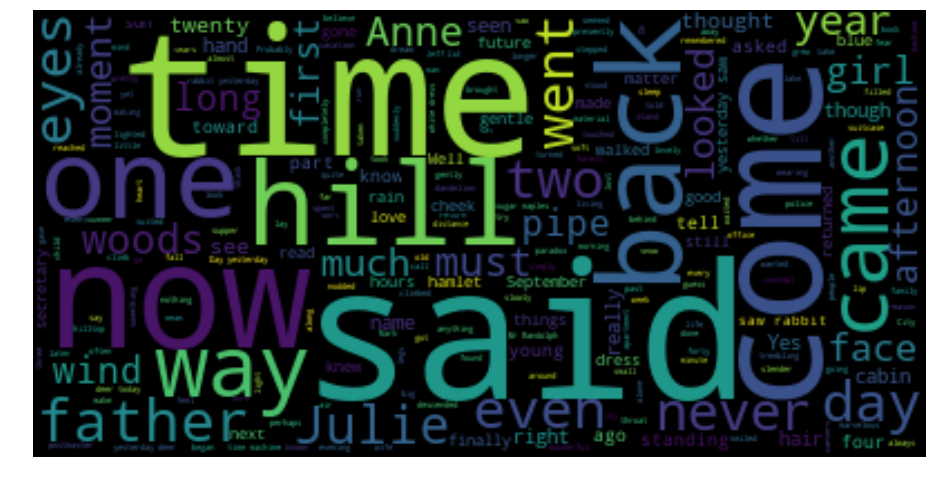

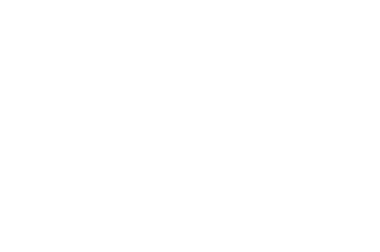

In [29]:
plt.figure(figsize=(16,13))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.axis("off")
plt.show()